# 使用PCA对人脸图片进行处理

此部分作业要求使用PCA技术对给定的人脸数据集进行处理，你需要在该文件中完成你的代码，并输出结果。



本次使用到的人脸数据集是 ORL人脸数据集，共包含40个不同人的400张图像。此数据集下包含40个目录，每个目录下有10张图像，每个目录表示一个不同的人。所有的图像是以PGM格式存储，灰度图，图像大小宽度为92，高度为112。



数据集中部分图像示例：

![image-20230428112024592](./faces.png)



在本次作业中，你需要**按顺序**完成以下内容并且在该文件中**保留要求**的输出结果：

1. 将数据集划分为80%的训练集，20%的测试集，在训练集上使用PCA将特征维度降为100，即得到100个特征和其对应的特征向量，并使用训练得到的PCA将测试集维度也压缩到100，**输出：压缩后的训练集维度和测试集维度、经过PCA得到的特征向量维度**。

2. 得到100个特征向量后，**使用这些向量重建特征脸并输出**。示例：

   ![image2](./feature.png)

3. 使用这100个特征和对应的特征向量，自行在训练集和测试集中**分别**选择**5张**人脸图片进行人脸重建并**输出对比图**。示例：

   ![image2](./restore.png)

4. **输出**降维后**每个**新特征向量所占的信息量占原始数据总信息量的百分比，以及所有返回特征所携带的**信息量总和**是原始数据的多少；

5. **画出**特征个数和所携带信息数的曲线图，此处特征数**上限设置为150**，此处以150为示例：

   ![image2](./information.png)

6.  保留特征数为150，得到的训练集每次保留前（n=n+1，n初值为1）个特征，分别训练一个KNN分类器，KNN分类器的参数*n_neighbors*为3，观察并验证测试集在使用其前n个特征时KNN分类的准确率。**注意：此处仅进行一次PCA**,输出：不同的特征保留数和准确率的曲线图。此处以*n_neighbors=5*为示例：

   ![image2](./acc.png)

   **本次作业严禁抄袭，一经发现严肃处理**


#  附加题

若感兴趣，可以自行拍摄自己或舍友的人脸照片、或者其他较为简单且特征明显的数据集进行PCA操作。


In [1]:
# 本次作业你可能需要用到的包和函数

%matplotlib inline
# 导入所需模块
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# plt显示灰度图片
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

# 读取一个文件夹下的所有图片，输入参数是文件名，返回文件地址列表
def read_directory(directory_name):
    faces_addr = []
    for filename in os.listdir(directory_name):
        faces_addr.append(directory_name + "/" + filename)
    return faces_addr

In [2]:
# 读全部数据到内存
datatset_all_raw = []
def read_image(path: str):
  return cv2.imread(path, cv2.IMREAD_GRAYSCALE)
for s in range(1, 41):
  for i in range(1, 11):
    datatset_all_raw.append(read_image(f"data/s{s}/{i}.pgm"))
im_shape = datatset_all_raw[0].shape
dataset_all = np.array(datatset_all_raw)
print("图片共有", len(dataset_all), "张, 图像 shape:", im_shape)
# 分割数据集
dataset_train, dataset_test = train_test_split(dataset_all, test_size=0.2, shuffle=True)
print("训练集", len(dataset_train), "测试集", len(dataset_test))

图片共有 400 张, 图像 shape: (112, 92)
训练集 320 测试集 80


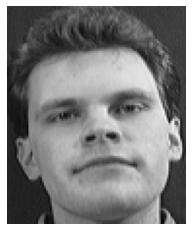

In [3]:
# 显示一张图
def display(img):
    # Show image
    plt.imshow(img, cmap = plt.cm.gray)
    plt.axis('off')
    plt.show()

display(dataset_train[0])

In [4]:
# 进行 PCA 分析压缩
pca = PCA(n_components=100)
d = np.array([x.flatten() for x in dataset_train])
print('压缩前训练集数据', d.shape)
t = pca.fit_transform(d)
print('压缩后训练集数据', t.shape)

压缩前训练集数据 (320, 10304)
压缩后训练集数据 (320, 100)


(320, 10304)


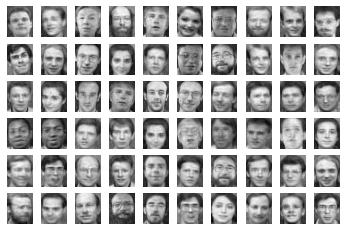

In [5]:
# 显示根据训练集重建的图像，6x10 个
inv = pca.inverse_transform(t)
print(inv.shape)
# display(inv[3].reshape(im_shape))
for i in range(60):
  plt.subplot(6, 10, i + 1)
  plt.axis('off')
  plt.imshow(inv[i].reshape(im_shape), cmap = plt.cm.gray)

In [6]:
d_test = np.array([x.flatten() for x in dataset_test])
print(d_test.shape)
t_test = pca.transform(d_test)
inv_test = pca.inverse_transform(t_test)

(80, 10304)


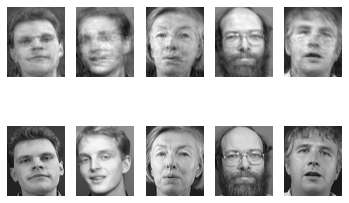

In [7]:
# 在训练集中对比5个图像和重建后的图像
for i in range(5):
  plt.subplot(2, 5, i + 1)
  plt.axis('off')
  plt.imshow(inv[i].reshape(im_shape), cmap = plt.cm.gray)
  plt.subplot(2, 5, i + 1 + 5)
  plt.axis('off')
  plt.imshow(d[i].reshape(im_shape), cmap = plt.cm.gray)

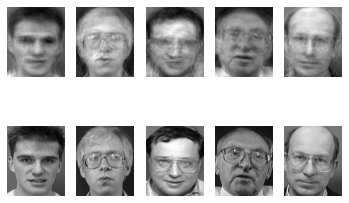

In [8]:
# 在测试集中对比5个图像和重建后的图像
for i in range(5):
  plt.subplot(2, 5, i + 1)
  plt.axis('off')
  plt.imshow(inv_test[i].reshape(im_shape), cmap = plt.cm.gray)
  plt.subplot(2, 5, i + 1 + 5)
  plt.axis('off')
  plt.imshow(d_test[i].reshape(im_shape), cmap = plt.cm.gray)

In [9]:
# 每个新特征向量所占的信息量占原始数据总信息量的百分比
pca.explained_variance_ratio_

array([0.18055829, 0.1300067 , 0.06613997, 0.05708282, 0.0479915 ,
       0.03532795, 0.02532577, 0.02409034, 0.02002866, 0.01866267,
       0.01497904, 0.01353267, 0.01204143, 0.01064647, 0.00977973,
       0.00926836, 0.0087991 , 0.00820814, 0.00795962, 0.00711313,
       0.00703417, 0.00635305, 0.00593871, 0.00535787, 0.00527743,
       0.0052438 , 0.00511338, 0.00491983, 0.00460765, 0.00458623,
       0.00441173, 0.00407448, 0.00393472, 0.0038833 , 0.00364816,
       0.00357596, 0.0034509 , 0.00343124, 0.00319522, 0.00309421,
       0.00304961, 0.00298033, 0.00290829, 0.00283942, 0.00277559,
       0.00266827, 0.00260841, 0.00253706, 0.00252812, 0.00244228,
       0.00233676, 0.00228401, 0.00223536, 0.00221717, 0.00216109,
       0.00213721, 0.00208454, 0.00201942, 0.00201199, 0.00200074,
       0.00194004, 0.00188535, 0.00185237, 0.00179338, 0.00174537,
       0.00172631, 0.00169736, 0.00163314, 0.00161997, 0.00160116,
       0.00158178, 0.00154425, 0.00152456, 0.00147743, 0.00144

In [14]:
np.sum(pca.explained_variance_ratio_)

0.9025618808892172

In [10]:
# 重新训练一个 150 特征量的 PCA
pca_150 = PCA(n_components=150)
pca_150.fit(d)

PCA(n_components=150)

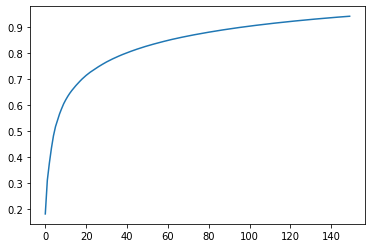

In [11]:
# 画出 特征个数-携带信息数 曲线图
plt.plot(np.cumsum(pca_150.explained_variance_ratio_))
plt.show()

In [12]:
# 得到 150 特征下的特征
t_150 = pca.transform(np.array([x.flatten() for x in dataset_all]))
# inv_test_150 = pca.inverse_transform(t_test_150)
print(t_150.shape)

(400, 100)


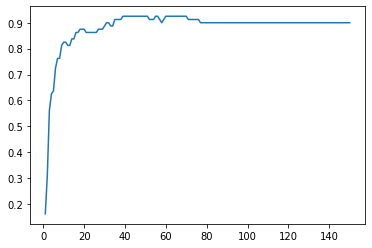

In [13]:
# 重新划分训练集和测试集，x 为特征， 为分类
knn_x, knn_y = t_150, np.array([([s]*10) for s in range(1, 41)]).flatten().reshape((-1, 1))
# print(knn_x, knn_y)
knn_train_x, knn_test_x, knn_train_y, knn_test_y = train_test_split(knn_x, knn_y, test_size=0.2, shuffle=True)
# print(knn_train_x.shape, knn_train_y.shape, knn_test_x.shape, knn_test_y.shape)

scores = []
for n in range(1, 151):
  test_feature = knn_test_x[:, :n]
  test_data = knn_test_y
  train_feature = knn_train_x[:, :n]
  train_data = knn_train_y
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(train_feature, train_data.ravel())
  # print(knn.score(test_feature, test_data))
  # print(knn.predict(train_feature))
  # print(knn.predict(test_feature))
  scores.append([n, knn.score(test_feature, test_data)])
scores = np.array(scores)
plt.plot(scores[:, :1], scores[:, 1:2])
plt.show()